# Task1- Stock Price Prediction

In [1]:
!pip install pandas numpy matplotlib tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=0&period2=9999999999&interval=1d&events=history')

In [4]:
data = df['Close'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
look_back = 60  # Adjust this for different prediction horizons
X, y = [], []

In [7]:
for i in range(len(data_scaled)-look_back):
    X.append(data_scaled[i:i+look_back, 0])
    y.append(data_scaled[i+look_back, 0])

In [8]:
X, y = np.array(X), np.array(y)

In [9]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [10]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
336/336 [==============================] - 82s 212ms/step - loss: 6.9082e-04
Epoch 2/10
336/336 [==============================] - 62s 184ms/step - loss: 1.2305e-04
Epoch 3/10
336/336 [==============================] - 65s 194ms/step - loss: 1.2047e-04
Epoch 4/10
336/336 [==============================] - 63s 189ms/step - loss: 7.3953e-05
Epoch 5/10
336/336 [==============================] - 62s 185ms/step - loss: 7.8422e-05
Epoch 6/10
336/336 [==============================] - 60s 180ms/step - loss: 6.2685e-05
Epoch 7/10
336/336 [==============================] - 59s 177ms/step - loss: 6.7595e-05
Epoch 8/10
336/336 [==============================] - 63s 187ms/step - loss: 5.4578e-05
Epoch 9/10
336/336 [==============================] - 62s 186ms/step - loss: 5.5503e-05
Epoch 10/10
336/336 [==============================] - 66s 197ms/step - loss: 6.2405e-05


In [13]:
predicted_stock_prices = model.predict(X)

336/336 [==============================] - 27s 74ms/step


In [14]:
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

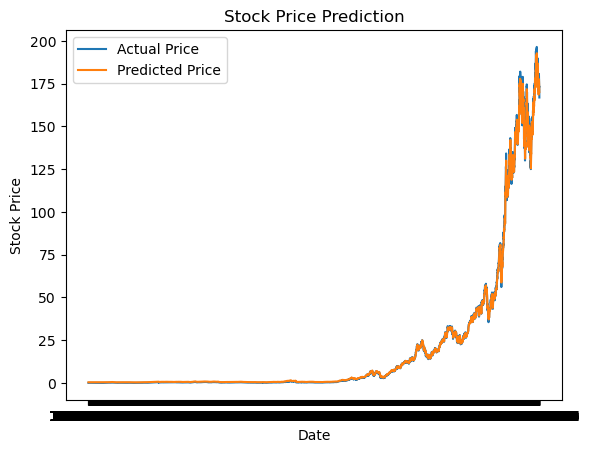

In [15]:
plt.plot(df['Date'][look_back:], data[look_back:], label='Actual Price')
plt.plot(df['Date'][look_back:], predicted_stock_prices, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [16]:
split_ratio = 0.8
split_index = int(split_ratio * len(data_scaled))

In [17]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
271/271 [==============================] - 57s 211ms/step - loss: 9.3478e-07
Epoch 2/10
271/271 [==============================] - 54s 201ms/step - loss: 8.5436e-07
Epoch 3/10
271/271 [==============================] - 55s 201ms/step - loss: 8.6097e-07
Epoch 4/10
271/271 [==============================] - 55s 201ms/step - loss: 8.8488e-07
Epoch 5/10
271/271 [==============================] - 55s 202ms/step - loss: 8.9491e-07
Epoch 6/10
271/271 [==============================] - 58s 212ms/step - loss: 8.9030e-07
Epoch 7/10
271/271 [==============================] - 58s 213ms/step - loss: 9.1565e-07
Epoch 8/10
271/271 [==============================] - 58s 214ms/step - loss: 9.2700e-07
Epoch 9/10
271/271 [==============================] - 59s 216ms/step - loss: 9.3723e-07
Epoch 10/10
271/271 [==============================] - 58s 213ms/step - loss: 1.0927e-06


In [19]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

Test Loss: 0.0001428991527063772


In [20]:
predicted_test_prices = model.predict(X_test)
predicted_test_prices = scaler.inverse_transform(predicted_test_prices)

66/66 [==============================] - 5s 74ms/step


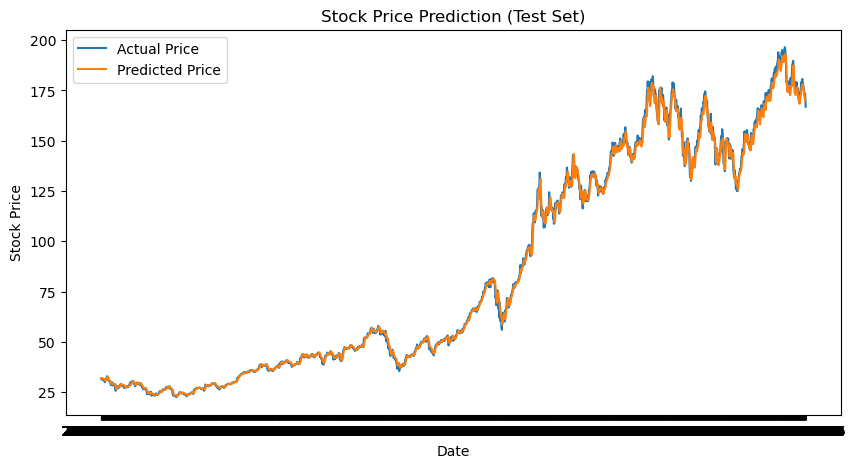

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'][split_index+look_back:], data[split_index+look_back:], label='Actual Price')
plt.plot(df['Date'][split_index+look_back:], predicted_test_prices, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction (Test Set)')
plt.legend()
plt.show()